# Statistical Learning 1
## Ensayo SVM

### Support Vector Machine (SVM)

SVM es un modelo lineal para problemas de clasificación y de regresión.Tiene la capacidad de resolver problemas lineales como no lineales. La idea del algoritmo SVM es muy simple, crear una linea o hiperplano el cual separe los datos en 2 clases.

Este algoritmo trabaja realmente bien para datasets pequeños o medianos y es muy facil de calibrar.

#### Un poco de teoría sobre SVM

Como se dijo anteriormente, este algoritmo toma los datos de entrada de los datasets y da como salida una línea que separa estos datos, si es que se puede, en dos clases.

Supongamos que tenemos un dataset como el que se muestra en la siguiente imagen, y necesitamos clasificar los cuadrados rojos y los círculos azules.

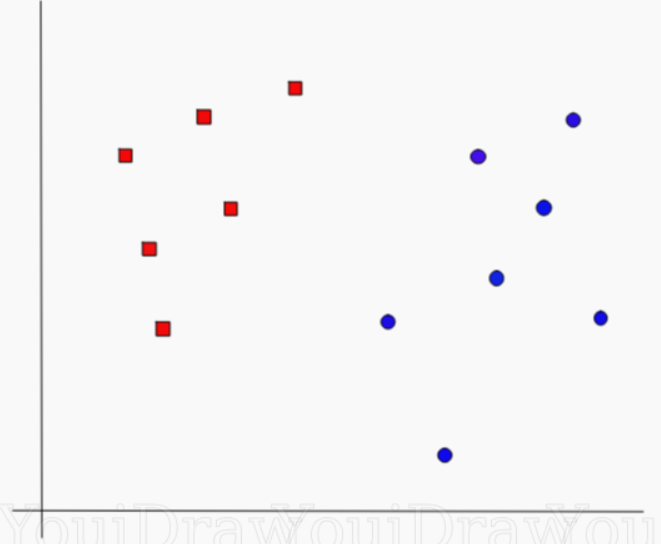

No pareciera ser una tarea difícil, pero si evaluamos bien, pueden existir varias o infinitas líneas que pueden hacer la tarea solicitada, entonces ¿cómo SVM encuentra la línea ideal?

Dibujemos algunas líneas candidatas:

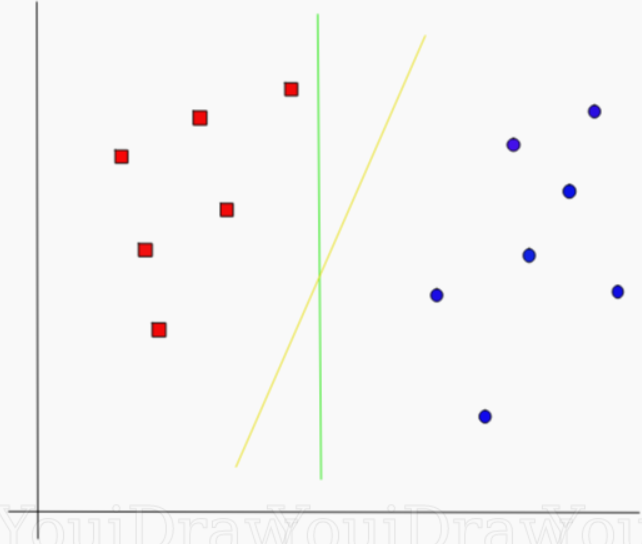

Se tienen 2 líneas candidatas, la verde y la amarilla, ¿cuál podria separar mejor los datos? La amarilla, ya que, para este ejemplo, se puede intuir que clasifica mejor, pero necesitamos algo más para ajustar la línea.

En el caso de la línea verde queda muy cerca de los cuadros rojos, por lo que no está generalizando los datos y el objetivo en Machine Learning es obtener un separador que generalice mejor los datos.

### La forma en que SVM encuentra la mejor línea

Según el algoritmo, encuentra los puntos más cercanos de ambas clases a la línea. Estos puntos se les denomina vectores de soporte o **support vectors**. Luego se calcula el margen (la distancia) entre la linea y esos vectores de soporte, y el objetivo es maximizar el margen. El hiperplano para el cual cada margen es maximizado es el hiperplano óptimo.

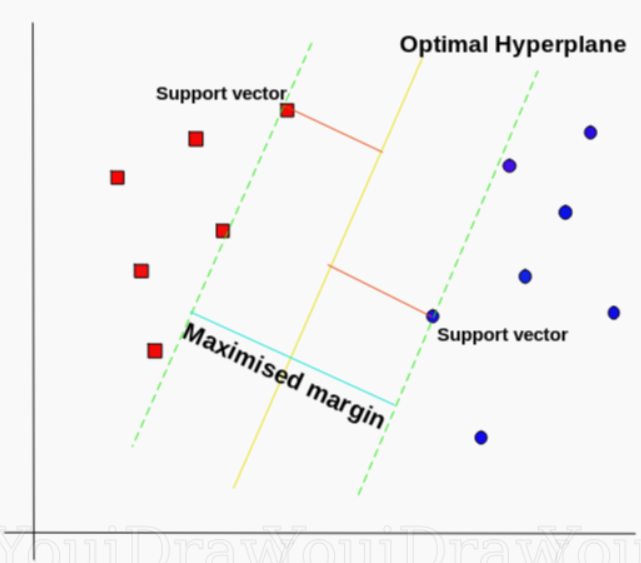

### Objetivo de la Optimización

Para encontrar la frontera de decisión se debe:
* Definir la hipótesis
* Definir la función costo (loss)
* Usar la función para calcular el costo de para todos los puntos entrenables
* Usar un algoritmo de optimización, como gradient descent, para minimizar el costo y encontrar los parámetros ideales para el modelo.

#### Hipótesis
La hipótesis para SVM no es más que la distancia entre un punto de los datos y la frontera de decisión, por lo que es bastante sencilla para los pesos ***w***

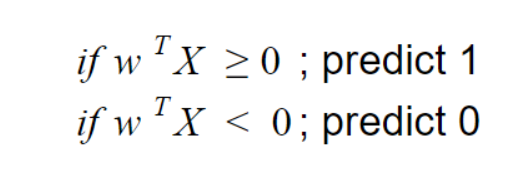

#### Función de Costo (loss)

La función de costo de SVM penaliza no solo por clasificación errónea sino también cuandos los puntos comienzan a acercarse a la frontera de decisión, por lo que, el algoritmos de optimización debe entontrar pesos que mantengan una distancia o margen entre las clases.

Ahora veamos la fórmula para el costo hinge o de la bisagra:

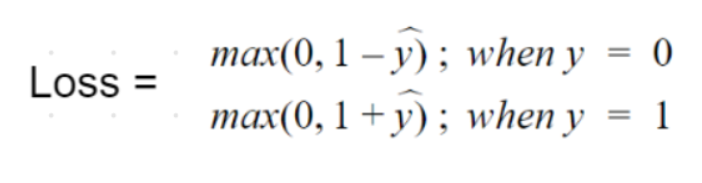

La interpretación de la función de costo es:
* para y = 1, si el valor de la hipótesos es mayor o igual que 1, el costo es 0. Si la hipótesis está entre 0 y 1 o es negativa, el costo mantiene un valor positivo y se incrementa linealmente.
* para y = 0, si el valor de la hipótesis es mayor o igual a -1, el costo es cero. Si la hipótesis está entre -1 y 0 o es positiva, el costo es positivo y se incrementa linealmente.

Combinando las fórmulas de costo de bisagra y la del costo de un entrenamiento simple obtenemos:

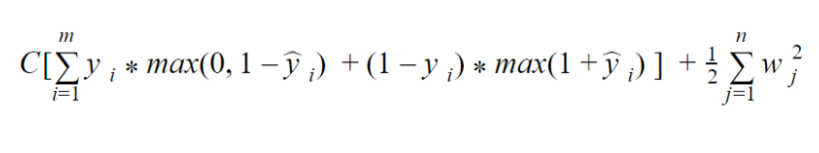

### Kernel Trick

Kernel Trick es lo que hace a SVM muy poderoso. Este permite que el algoritmo aprenda más límites de decisión complejos y no solo algunos lineales.

Veamos la hipótesis y función de costo para SVM con kernels:

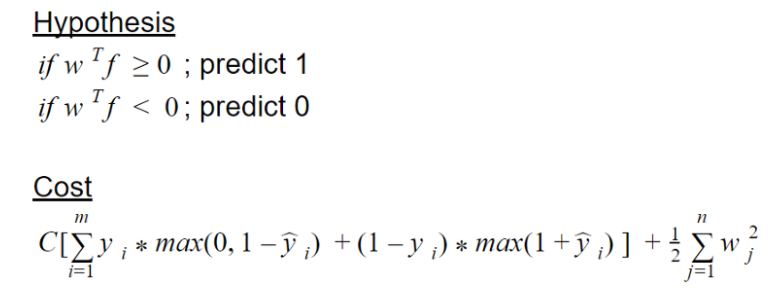# 

Como se puede apreciar, no hay mucho cambio en las ecuaciones, solo que en lugar de la variable ***X*** la hipótesis tiene ***f*** la cual es la matriz de nuevas características. Se obtienen los valores de esas características de una función y esta función es la que llamamos **kernel**. La **y^ (y hat)** representa la nueva hipótesis formulada.

Los siguientes son algunos de los kernels más comúnmente utilizados:

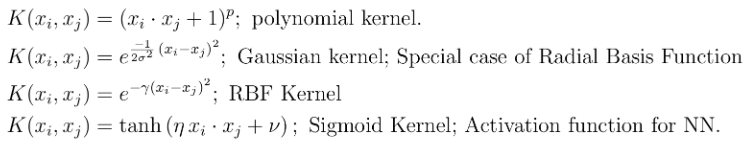

### Links de Referencias
https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989

https://towardsdatascience.com/decoding-support-vector-machines-5b81d2f7b76f

### Ejemplo de SVM con Tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import tensorboard_logger as tl

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from joblib import dump
#import datetime
from tensorboard_logger import configure, log_value

import datetime, os
import scipy
import seaborn as sns
#%load_ext tensorboard

In [2]:
#pip install tensorboard_logger

In [3]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


## Carga del dataset

In [4]:
data = pd.read_csv('data_titanic_proyecto.csv')

## Análisis Exploratorio

In [5]:
data.head(10)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N
5,6,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,Q,Lower,M,N
6,7,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,Upper,M,N
7,8,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,S,Lower,M,N
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,S,Lower,F,Y
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,C,Middle,F,Y


In [6]:
data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


### Columnas con datos incompletos

In [7]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(8)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
passenger_survived,0,0.0
passenger_sex,0,0.0
passenger_class,0,0.0
Fare,0,0.0
Ticket,0,0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Name                891 non-null    object 
 2   Age                 714 non-null    float64
 3   SibSp               891 non-null    int64  
 4   Parch               891 non-null    int64  
 5   Ticket              891 non-null    object 
 6   Fare                891 non-null    float64
 7   Cabin               204 non-null    object 
 8   Embarked            889 non-null    object 
 9   passenger_class     891 non-null    object 
 10  passenger_sex       891 non-null    object 
 11  passenger_survived  891 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


Datos faltantes en columnas ***Age, Cabin y Embarked***

### Diccionario

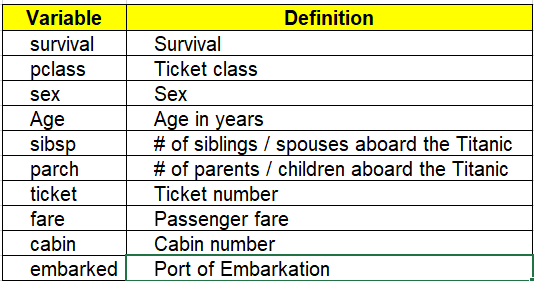

## Transformación de features 

In [13]:
onehot_class = np.array(data['passenger_class']).reshape(-1,1)

enc_train = OneHotEncoder(categories='auto')
enc_train.fit(onehot_class)
onehot_class = enc_train.transform(onehot_class).toarray()
data['Low_class'], data['Mid_class'], data['Upp_class'] = [onehot_class.T[0], onehot_class.T[1], onehot_class.T[2]]

In [14]:
data['passenger_sex'] = data['passenger_sex'].replace('M',1)
data['passenger_sex'] = data['passenger_sex'].replace('F',0)
data['passenger_sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: passenger_sex, dtype: int64

In [15]:
data['passenger_survived'] = data['passenger_survived'].replace('Y',1)
data['passenger_survived'] = data['passenger_survived'].replace('N',0)
data['passenger_survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: passenger_survived, dtype: int64

In [16]:
data = data.dropna(subset = ['Embarked'])

onehot_embarked = np.array(data['Embarked']).reshape(-1,1)
enc_train = OneHotEncoder(categories='auto')
enc_train.fit(onehot_embarked)
onehot_embarked = enc_train.transform(onehot_embarked).toarray()
data['Emb_C'], data['Emb_Q'], data['Emb_S'] = [onehot_embarked.T[0], onehot_embarked.T[1], onehot_embarked.T[2]]

In [17]:
data_clean = data.drop(columns = ['Embarked', 'passenger_class', 'Ticket', 'Name', 'Cabin', 'PassengerId'])
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 712 non-null    float64
 1   SibSp               889 non-null    int64  
 2   Parch               889 non-null    int64  
 3   Fare                889 non-null    float64
 4   passenger_sex       889 non-null    int64  
 5   passenger_survived  889 non-null    int64  
 6   Low_class           889 non-null    float64
 7   Mid_class           889 non-null    float64
 8   Upp_class           889 non-null    float64
 9   Emb_C               889 non-null    float64
 10  Emb_Q               889 non-null    float64
 11  Emb_S               889 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 90.3 KB


In [18]:
data_clean['Age'].fillna(int(data_clean['Age'].mean()), inplace=True)

In [19]:
data_clean

,Age,SibSp,Parch,Fare,passenger_sex,passenger_survived,Low_class,Mid_class,Upp_class,Emb_C,Emb_Q,Emb_S
0,22.0,1,0,7.2500,1,0,1.0,0.0,0.0,0.0,0.0,1.0
1,38.0,1,0,71.2833,0,1,0.0,0.0,1.0,1.0,0.0,0.0
2,26.0,0,0,7.9250,0,1,1.0,0.0,0.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,0,1,0.0,0.0,1.0,0.0,0.0,1.0
4,35.0,0,0,8.0500,1,0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,0.0,1.0,0.0,0.0,0.0,1.0
887,19.0,0,0,30.0000,0,1,0.0,0.0,1.0,0.0,0.0,1.0
888,29.0,1,2,23.4500,0,0,1.0,0.0,0.0,0.0,0.0,1.0
889,26.0,0,0,30.0000,1,1,0.0,0.0,1.0,1.0,0.0,0.0


In [20]:
data_clean['MiembrosFam'] = data_clean['SibSp'] + data_clean['Parch']

In [21]:
data_clean

,Age,SibSp,Parch,Fare,passenger_sex,passenger_survived,Low_class,Mid_class,Upp_class,Emb_C,Emb_Q,Emb_S,MiembrosFam
0,22.0,1,0,7.2500,1,0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,38.0,1,0,71.2833,0,1,0.0,0.0,1.0,1.0,0.0,0.0,1
2,26.0,0,0,7.9250,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0
3,35.0,1,0,53.1000,0,1,0.0,0.0,1.0,0.0,0.0,1.0,1
4,35.0,0,0,8.0500,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0
887,19.0,0,0,30.0000,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0
888,29.0,1,2,23.4500,0,0,1.0,0.0,0.0,0.0,0.0,1.0,3
889,26.0,0,0,30.0000,1,1,0.0,0.0,1.0,1.0,0.0,0.0,0


In [22]:
# Volvemos a revisar si hay datos incompletos en las columnas del dataframe depurado
total = data_clean.isnull().sum().sort_values(ascending=False)
percent_1 = data_clean.isnull().sum()/data_clean.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(8)

,Total,%
MiembrosFam,0,0.0
Emb_S,0,0.0
Emb_Q,0,0.0
Emb_C,0,0.0
Upp_class,0,0.0
Mid_class,0,0.0
Low_class,0,0.0
passenger_survived,0,0.0


### Estandarización de valores de columnas que no son de Característica

In [23]:
data_clean[['Age','SibSp','Parch','Fare','MiembrosFam']] = normalize(data_clean[['Age','SibSp','Parch','Fare','MiembrosFam']])

In [24]:
ys = data_clean['passenger_survived']
ys

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: passenger_survived, Length: 889, dtype: int64

In [25]:
#x_train = data_clean.drop(columns=['passenger_survived'])
xs = data_clean.drop('passenger_survived', axis=1)
xs

,Age,SibSp,Parch,Fare,passenger_sex,Low_class,Mid_class,Upp_class,Emb_C,Emb_Q,Emb_S,MiembrosFam
0,0.947992,0.043091,0.000000,0.312406,1,1.0,0.0,0.0,0.0,0.0,1.0,0.043091
1,0.470345,0.012377,0.000000,0.882309,0,0.0,0.0,1.0,1.0,0.0,0.0,0.012377
2,0.956551,0.000000,0.000000,0.291564,0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000
3,0.550202,0.015720,0.000000,0.834735,0,0.0,0.0,1.0,0.0,0.0,1.0,0.015720
4,0.974555,0.000000,0.000000,0.224148,1,1.0,0.0,0.0,0.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.901002,0.000000,0.000000,0.433816,1,0.0,1.0,0.0,0.0,0.0,1.0,0.000000
887,0.535052,0.000000,0.000000,0.844819,0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000
888,0.773704,0.026679,0.053359,0.625633,0,1.0,0.0,0.0,0.0,0.0,1.0,0.080038
889,0.654931,0.000000,0.000000,0.755689,1,0.0,0.0,1.0,1.0,0.0,0.0,0.000000


## Separación del Set de Datos para Entrenamiento, Pruebas y Validación

In [47]:
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.20, random_state=109)

In [34]:
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=109)

In [48]:
print("Sizes of Train ",x_train.shape, " Test ",x_test.shape)

Sizes of Train  (711, 12)  Test  (178, 12)


In [53]:
print("Sizes of Train ",y_train.shape, " Test ",y_test.shape)

Sizes of Train  (711,)  Test  (178,)


### SVM con sklearn

In [58]:
def f_trainSVM(px_train, py_train, p_C= 1.0, p_kernel = 'rbf'):
    ## rbf = radial basis function
    
    fstring = './ensayos/'+"SVM"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "_C=" + str(p_C) + "_kernel=" + p_kernel
     
    #logs = tensorboard_logger.Logger(fstring)
    #tl.configure(fstring)
    tlogs = tl.Logger(fstring)
    
    modeloSvm = svm.SVC(C=p_C, kernel=p_kernel)
    modeloSvm.fit(px_train, y_train)
    
    # train accuracy
    train_accuracy = modeloSvm.score(px_train, y_train)
    tlogs.log_value('train_accuracy', train_accuracy, 1)

    # Validation accuracy
    val_accuracy = modeloSvm.score(x_val, y_val)
    tlogs.log_value('val_accuracy', val_accuracy, 1)
    
    #SVM_preditcions_val 
    Y_pred = modeloSvm.predict(x_val)
    
    print(classification_report(Y_pred, y_val))
    
    print("training accuracy:", train_accuracy)
    print("validate accuracy:", val_accuracy)
    print("---------------------------------------------------")
    
    return modeloSvm

### Entrenamientos con los diferentes Kernels soportados

In [59]:
f_trainSVM(x_train, y_train,p_C = 1.0, p_kernel = 'sigmoid')

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        89
           1       0.59      0.59      0.59        54

    accuracy                           0.69       143
   macro avg       0.67      0.67      0.67       143
weighted avg       0.69      0.69      0.69       143

training accuracy: 0.6891701828410689
validate accuracy: 0.6923076923076923
---------------------------------------------------


SVC(kernel='sigmoid')

In [60]:
f_trainSVM(x_train, y_train,p_C = 1.0, p_kernel = 'rbf')

              precision    recall  f1-score   support

           0       0.97      0.77      0.86       111
           1       0.54      0.91      0.67        32

    accuracy                           0.80       143
   macro avg       0.75      0.84      0.77       143
weighted avg       0.87      0.80      0.82       143

training accuracy: 0.8115330520393812
validate accuracy: 0.8041958041958042
---------------------------------------------------


SVC()

In [61]:
f_trainSVM(x_train, y_train,p_C = 1.0, p_kernel = 'poly')

              precision    recall  f1-score   support

           0       0.97      0.77      0.86       111
           1       0.54      0.91      0.67        32

    accuracy                           0.80       143
   macro avg       0.75      0.84      0.77       143
weighted avg       0.87      0.80      0.82       143

training accuracy: 0.8143459915611815
validate accuracy: 0.8041958041958042
---------------------------------------------------


SVC(kernel='poly')

In [62]:
f_trainSVM(x_train, y_train,p_C = 1.0, p_kernel = 'linear')

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        96
           1       0.65      0.74      0.69        47

    accuracy                           0.78       143
   macro avg       0.76      0.77      0.76       143
weighted avg       0.79      0.78      0.79       143

training accuracy: 0.790436005625879
validate accuracy: 0.7832167832167832
---------------------------------------------------


SVC(kernel='linear')

## Ventajas y desventajas

### Ventajas

* Funciona relativamente bien cuando hay un claro margen de separación entre clases.
* Es más eficaz en espacios de gran dimensión.
* Es eficaz en los casos en que el número de dimensiones es mayor que el número de muestras.
* Es relativamente eficiente en memoria

### Desventajas

* El algoritmo SVM no es adecuado para grandes conjuntos de datos.
* SVM no funciona muy bien cuando el conjunto de datos tiene más ruido, es decir, las clases de destino se superponen.
* En los casos en que el número de características para cada punto de datos exceda el número de muestras de datos de entrenamiento, el SVM tendrá un rendimiento inferior.
* Como el clasificador de vectores de soporte funciona poniendo puntos de datos, por encima y por debajo del hiperplano de clasificación no hay una explicación probabilística para la clasificación.